In [23]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import scipy
import statistics
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import os

In [24]:
path = os.getcwd()
iris_df = pd.read_csv(path+'\\Learn Dataset\\iris_dataset_missing.csv')
#iris_df = pd.read_csv(path+"\\Iris_Kaggle_PDF\\iris_train.csv")
print(iris_df.head())
iris_df_nona = iris_df.dropna()
iris_df_nona["Class"] = list(iris_df_nona.loc[:,"species"].values)
iris_df_nona["Class"]=iris_df_nona["Class"].replace("Iris-versicolor",0).replace("Iris-setosa",1).replace("Iris-virginica",2)

   sepal_length  sepal_width  petal_length  petal_width          species
0      5.045070     2.508203      3.018024     1.164924  Iris-versicolor
1      6.325517     2.115481      4.542052     1.413651  Iris-versicolor
2      5.257497     3.814303      1.470660     0.395348      Iris-setosa
3      6.675168     3.201700      5.785461     2.362764   Iris-virginica
4      5.595237     2.678166      4.077750     1.369266  Iris-versicolor


In [25]:
iris_df_test = pd.read_csv(path+"\\Iris_Kaggle_PDF\\iris_test.csv")

In [12]:
iris_df_nona.describe()

,sepal_length,sepal_width,petal_length,petal_width,Class
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,5.867894,3.054935,3.808118,1.209826,1.000000
std,0.892271,0.439463,1.811399,0.793656,0.820922
min,4.344007,1.946010,1.033031,-0.072203,0.000000
25%,5.152435,2.794790,1.541564,0.333494,0.000000
50%,5.636744,3.049459,4.192791,1.369266,1.000000
75%,6.478961,3.239682,5.098860,1.837925,2.000000
max,7.795561,4.249211,6.768611,2.603123,2.000000


### The above decription suggests the presence of 

<Figure size 864x864 with 0 Axes>

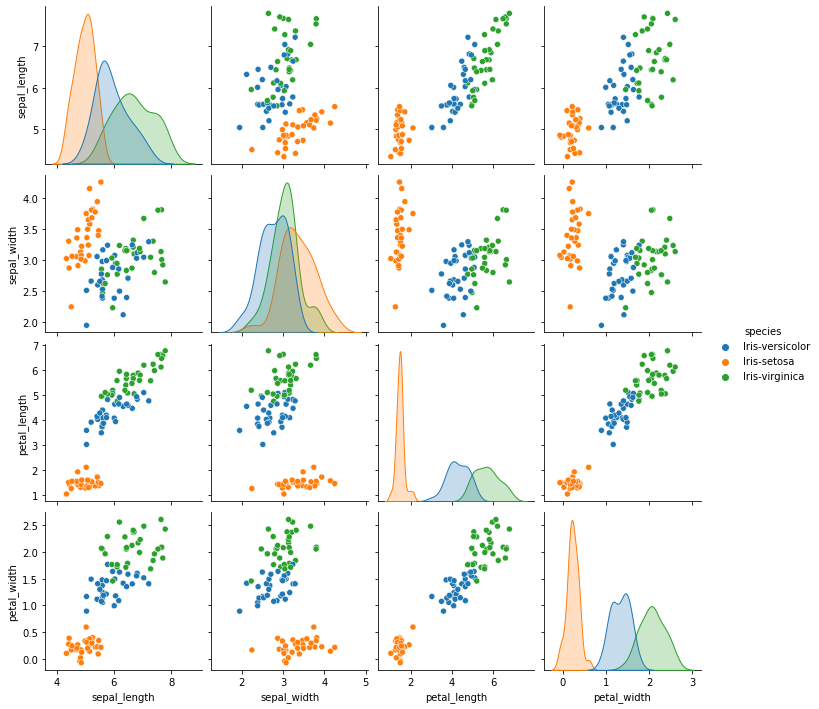

In [13]:
fig1 = plt.figure(figsize=(12,12))
sn = sns.pairplot(iris_df_nona.drop(columns=["Class"]),hue='species', dropna=True)
sn.savefig("CM1_Iris.png")

In [14]:
iris_df_nona.corr()

,sepal_length,sepal_width,petal_length,petal_width,Class
sepal_length,1.000000,-0.014750,0.879809,0.813983,0.351707
sepal_width,-0.014750,1.000000,-0.285793,-0.252136,0.261473
petal_length,0.879809,-0.285793,1.000000,0.958429,0.319066
petal_width,0.813983,-0.252136,0.958429,1.000000,0.382987
Class,0.351707,0.261473,0.319066,0.382987,1.000000


In [26]:
cols = iris_df_nona.columns
for i in cols:
    try:
        print("Skew of ",i, scipy.stats.skew(iris_df_nona.loc[:,i]))
        print("Kurtosis of ",i, scipy.stats.kurtosis(iris_df_nona.loc[:,i]))
        print("Mean of ",i, statistics.mean(iris_df_nona.loc[:,i]))
        print("Variance of ",i, statistics.variance(iris_df_nona.loc[:,i]))
        print("")
    except:
        pass


Skew of  sepal_length 0.41780073656176503
Kurtosis of  sepal_length -0.7056907198851405
Mean of  sepal_length 5.8678935378329244
Variance of  sepal_length 0.7961469847275912

Skew of  sepal_width 0.1837539677513432
Kurtosis of  sepal_width 0.24582896985113
Mean of  sepal_width 3.0549349521835065
Variance of  sepal_width 0.1931281503408631

Skew of  petal_length -0.23438961958410212
Kurtosis of  petal_length -1.4011477488138373
Mean of  petal_length 3.8081183998737864
Variance of  petal_length 3.2811668273075663

Skew of  petal_width -0.09949385864536328
Kurtosis of  petal_width -1.313533572417677
Mean of  petal_width 1.2098255632819341
Variance of  petal_width 0.6298904416646675

Skew of  Class 0.0
Kurtosis of  Class -1.5
Mean of  Class 1
Variance of  Class 0.6739130434782609



In [27]:
iris_df_nona_X = iris_df_nona.copy()
iris_df_nona_Y = iris_df_nona.copy()
iris_df_nona_X = iris_df_nona_X.drop(columns=["Class","species"])
iris_df_nona_Y = iris_df_nona_Y.drop(columns=["sepal_length","sepal_width","petal_length","petal_width","species"])


In [29]:
iris_df_nona_X

,sepal_length,sepal_width,petal_length,petal_width
0,5.045070,2.508203,3.018024,1.164924
1,6.325517,2.115481,4.542052,1.413651
2,5.257497,3.814303,1.470660,0.395348
3,6.675168,3.201700,5.785461,2.362764
4,5.595237,2.678166,4.077750,1.369266
...,...,...,...,...
100,4.874848,3.217348,1.592887,0.123588
101,5.564197,2.771731,3.483588,1.074754
102,5.548047,4.249211,1.453466,0.214527
103,5.510482,2.652867,4.276817,1.298032


In [30]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(iris_df_nona_X, iris_df_nona_Y, test_size = 0.4, random_state = 275)
X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state= 275)

Text(0.5, 1.0, 'KNN classifier; Iris Dataset; No data cleaning')

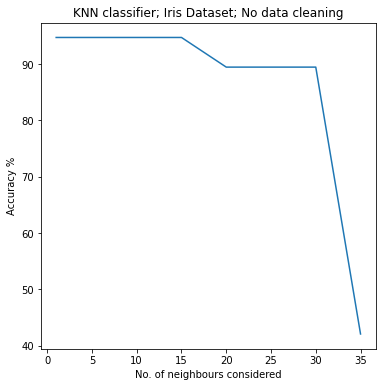

In [31]:
k_n = [1, 5, 10, 15, 20, 25, 30, 35]
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; Iris Dataset; No data cleaning')

### One can notice that the performance of KNN classifier on the plain dataset is not very good over the given range of K values. The best performance is attained at K = 25

In [33]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return sklearn.metrics.roc_auc_score(y_test, y_pred, average=average)

### To compute roc curve in multiclass setting, we are using one hot encoding to encode the different classes

In [34]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(iris_df_nona_X, iris_df_nona_Y, test_size = 0.4, random_state = 275)
X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state= 275)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = multiclass_roc_auc_score(Y_test,Y_pred)
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='macro')
print('AUC Score; K = 25; IRIS - No cleaning...',auc_score)
print('Accuracy; K = 25, IRIS - No cleaning...',aucc_score)
print('F-score; K = 25, IRIS - No cleaning...', f_score)

AUC Score; K = 25; IRIS - No cleaning... 1.0
Accuracy; K = 25, IRIS - No cleaning... 1.0
F-score; K = 25, IRIS - No cleaning... 1.0


# Dealing with outliers

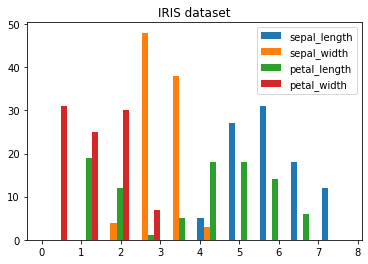

In [37]:
iris_df_X = iris_df.copy()
iris_df_X = iris_df.dropna().drop(columns=['species'])
iris_df_Y = iris_df.dropna().drop(columns=["sepal_length","sepal_width","petal_length","petal_width"])
n_bins = 10
plt.hist([iris_df_X.iloc[:,0],iris_df_X.iloc[:,1],iris_df_X.iloc[:,2], iris_df_X.iloc[:,3]],n_bins)
plt.title('IRIS dataset')
plt.legend(["sepal_length","sepal_width","petal_length","petal_width"])
plt.show()

### One can notice outliers in sepal_width, sepal_length and petal_length on either extremes of the histogram.

In [38]:
thres = 0
"""
outlier_ = iris_df_X[iris_df_X['sepal_length']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_width']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_length']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_width']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
"""
outlier_ = iris_df_X[iris_df_X['sepal_length']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_width']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_width']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_length']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)

### We have removed the outliers that lie outside the [-70, 70] range. Having negative values in measurement of length and width does not seem to make sense. As very little information is given on how these values were measured and the unit of measurement, it is hard to take a call on whether to consider negative values or not. Moreover, since almost all the entries have atleast one negative value in them, we will try to work with negative values as such.

# Normalization
### We will perform Z-score normalization on each attribute entries to normalize the data entries by subtracting it with mean and dividing each entry by standard deviation.

In [39]:
iris_df_X_norm = iris_df_X.copy()
iris_df_X_norm['sepal_length'] = (iris_df_X.loc[:,'sepal_length'] - iris_df_X.describe().loc['mean','sepal_length'])#/iris_df_X.describe().loc['std','sepal_length']
iris_df_X_norm['sepal_width'] = (iris_df_X.loc[:,'sepal_width'] - iris_df_X.describe().loc['mean','sepal_width'])#/iris_df_X.describe().loc['std','sepal_width']
iris_df_X_norm['petal_length'] = (iris_df_X.loc[:,'petal_length'] - iris_df_X.describe().loc['mean','petal_length'])#/iris_df_X.describe().loc['std','petal_length']
iris_df_X_norm['petal_width'] = (iris_df_X.loc[:,'petal_width'] - iris_df_X.describe().loc['mean','petal_width'])#/iris_df_X.describe().loc['std','petal_width']
iris_df_Y["Class"] = list(iris_df_Y.loc[:,"species"].values)
iris_df_Y["Class"]=iris_df_Y["Class"].replace("Iris-versicolor",0).replace("Iris-setosa",1).replace("Iris-virginica",2)
iris_df_Y_norm = iris_df_Y.copy().drop(columns=["species"])
iris_df_X_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,-4.196887e-16,-1.366428e-16,3.611275e-16,9.150190e-17
std,8.886183e-01,4.443127e-01,1.797814e+00,7.793702e-01
min,-1.546566e+00,-1.108934e+00,-2.826016e+00,-1.216944e+00
25%,-7.075708e-01,-2.716835e-01,-2.306119e+00,-8.963256e-01
50%,-1.951677e-01,-5.485214e-03,4.177704e-01,1.626804e-01
75%,5.959580e-01,2.100559e-01,1.282798e+00,6.231341e-01
max,1.904988e+00,1.194267e+00,2.909564e+00,1.365448e+00


AUC Score; K = 15; IRIS  ... 0.9121794871794872
Accuracy; K = 15, IRIS  ... 0.8888888888888888
F-score; K = 15, IRIS ... 0.8888888888888888


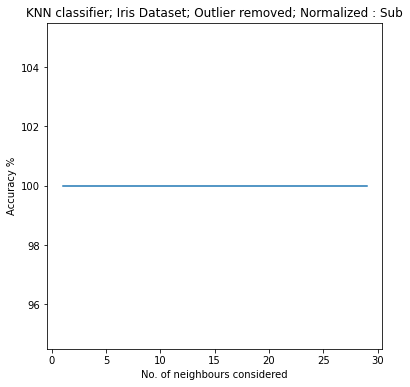

In [41]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(iris_df_X_norm, iris_df_Y_norm, test_size = 0.4, random_state = 275)
X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state= 275)
k_n = range(1,30)
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k,weights='distance', metric = 'euclidean')
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; Iris Dataset; Outlier removed; Normalized : Sub')
best_k = score_list.index(max(score_list))+1
knn_model = KNeighborsClassifier(n_neighbors=best_k,weights='distance', metric = 'euclidean')
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = multiclass_roc_auc_score(Y_test,Y_pred)
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred, normalize=True)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='weighted')
print('AUC Score; K = 15; IRIS  ...',auc_score)
print('Accuracy; K = 15, IRIS  ...',aucc_score)
print('F-score; K = 15, IRIS ...', f_score)

In [324]:
a = score_list.index(max(score_list))
a

12

## Handling negative values

In [67]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,99.000000,98.000000,103.000000
mean,4.483455,8.833197,6.901250,1.072824
std,30.853799,29.513908,27.901687,30.057568
min,-64.939919,-63.292986,-47.211576,-83.378535
25%,-16.095345,-7.273014,-12.107943,-20.686096
50%,4.238235,11.598673,6.257712,1.785393
75%,20.896169,26.123211,25.398957,22.570313
max,86.373997,118.661487,84.863246,70.661911


### The IRIS dataset is plagued with negative entries that denote distance which makes no sense. Shifting the entire dataset to positive side has little to no impact on KNN classifier performance as doing so preserves the physical distribution of the points with respect to one another. Meaning, shifting simply does not change the distance between points. So we will first eliminate negative entries from our dataset.

In [147]:
iris_df_X = iris_df.copy()
iris_df_X = iris_df_X.drop(columns=['species']).dropna()
df_len = iris_df_X
neg_labels = []
for i in range(len(iris_df_X)):
    if min(iris_df_X.iloc[i,:])<0:
        neg_labels.append(i)


In [148]:
len(neg_labels)

80

In [149]:
len(iris_df_X)

90